<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/22)_%EC%A7%81%EC%9B%90_%EC%9D%B4%EC%A7%81_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 직원 이직 예측
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 이직 현황 탐색  
2) 가설 수립 및 검증  
3) ML 활용 이직 지원 예측

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 문제상황 및 데이터 살펴보기
---

> **시나리오** 🎫 (HRD, HRM)

```
최근 이직 시장이 활발하게 성장함에 따라 A사에 직원들도 줄줄이 퇴사 행렬을 이어가고 있다.  
핵심인재의 유출이 지속되고 있어 회사 입장에서는 큰 문제에 봉착했다. HR팀은 이를 해결하기 위해 이직 가능성이 높은 핵심인재를 대상으로  
관리 프로그램을 운영하려고 한다.
```  

> **데이터 살펴보기**

* 직원 프로필 및 업무 역할에 관한 데이터
* 데이터 명세 ⬇

|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|
|:---:|:---:|:---:|:---:|:---:|:---:|  
|나이|이직여부|출장|일당|부서|집까지의거리|
|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|
|교육수준|전공|직원수|직원번호|환경만족도|성별|
|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|
|시급|업무 몰입도|업무레벨|업무역할|업무만족도|결혼여부|  
|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|
|월소득|월급|과거회사경험횟수|18년이상|야근여부|급여인상률|  
|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|
|고과|인간관계만족도|평균근무시간|스톡옵션레벨|총 경력|작년 훈련횟수|  
|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPromotion|YearsWithCurrManager|
|워라벨 수준|현 회사 근무년수|현재 업무 년차|마지막 승진일로부터 년차|현재 팀장함께한 년차|


In [2]:
# Data read
import pandas as pd
bath = '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter22_직원 이직 예측/'
df = pd.read_csv(bath + 'chapter22_job_transfer.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



## **문제해결 프로세스 정의**
---
> **문제정의**

```
이직 직원수 증가, 핵심인재 유출, 업무 로드 증가
```  

> **기대효과**

```
이직 직원수 감소, 핵심인재 방어, 업무 로드 평준화
```

> **해결방안**

```
이직 가능성이 높은 직원 예측 및 관리 프로그램 운영
Session 1
 - Data 전처리 및 이직 현황 데이터 탐색
Session 2
 - 가설 수립 후 해당 가설을 검증하기 위한 데이터 탐색
Session 3
 - ML 알고리즘을 활용하여 이직 가능성이 높은 직원 예측
```

> **성과측정**  

```
관리프로그램 운영 후 이직률 모니터링
```

> **현업적용**  

```
매 월 Model에 Input하기 위한 Data mart 생성
매 월 이직 가망 가능성 타겟 고객군 추출 및 관리프로그램 운영
```

> **주요 코드 미리 살펴보기**  

```
session 1 → np.where, groupby.agg()
session 2 → np.where, groupby.agg()
session 3 → RandomForestClassifier(), LabelEncoder(), roc_auc_score, roc_curve
```

## Session 1
## 이직 현황 탐색

### Data 전처리
---

In [3]:
# Data shape
# 1470 row, 35 col 구성
print('df', df.shape)

df (1470, 35)


In [4]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# null 확인
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# outlier 확인
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 이직 현황 탐색
---


In [7]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [8]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [9]:
# 이직률 약 16%
237 /(1233+237)

0.16122448979591836

In [10]:
# 모델에서 해석할 수 있는 1, 0으로 변환
import numpy as np
df['Attrition'] = np.where(df['Attrition']=='Yes', 1, 0)
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [11]:
# 고객 프로필(성별/연령대 분석)

# 구간화
import numpy as np
df['Age_gp']=np.where(df['Age'] <=30, '30 이하',
                      np.where(df['Age'] <=40, '30-40대', '40대 이상'))
df[['Age', 'Age_gp']]

,Age,Age_gp
0,41,40대 이상
1,49,40대 이상
2,37,30-40대
3,33,30-40대
4,27,30 이하
...,...,...
1465,36,30-40대
1466,39,30-40대
1467,27,30 이하
1468,49,40대 이상


In [12]:
# 연령별 이직률 현황
df_gp = df.groupby('Age_gp')['Attrition'].agg(['count','sum'])
df_gp['ratio']=round((df_gp['sum']/df_gp['count'])*100,1)
df_gp

,count,sum,ratio
Age_gp,,,
30 이하,386,100,25.9
30-40대,619,85,13.7
40대 이상,465,52,11.2


In [13]:
# 성별 이직률 현황
df_gp = df.groupby('Gender')['Attrition'].agg(['count','sum'])
df_gp['ratio']=round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [17]:
# 부서별 이직률 현황
df_gp = df.groupby('Department')['Attrition'].agg(['count','sum'])
df_gp['ratio'] =round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


## Session 2
## 가설 수립 및 검증  
* 내가 생각해야 하는 문제의 본질을 다양한 시각에서 바라보는 관점
* 현상에 집중하는 것이 아닌 문제의 본질을 이해하는 것에 중점  
* 가설을 다양한 관점에서 빠르게 수립하고 데이터로 검증하는 작업  
* ex) MZ 세대의 매출이 떨어짐
  * MZ 고객의 구매율이 떨어졌나?
  * 경쟁사로의 유출이 증가했나?
  * MZ 세대의 선호 상품군이 변경됐나?
  * 코로나 이슈로 인해 온라인 구매가 증가했나?  
   -> 다양한 관점에서 가설을 정의하고 데이터 검증 및 그에 맞는 전략을 수립해야 함.


### Hypothesis(1)
---
* 업무만족도는 높으나 인간관계로 인한 이직률이 높을 것이다.


In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_gp
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,40대 이상
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,40대 이상
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,30-40대
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,30-40대
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,30 이하


In [20]:
# 분석 대상 데이터만 가져오기
df[['JobSatisfaction', 'RelationshipSatisfaction', 'Attrition']].head()

,JobSatisfaction,RelationshipSatisfaction,Attrition
0,4,1,1
1,2,4,0
2,3,2,1
3,3,3,0
4,2,4,0


In [24]:
# 업무 만족도별 이직률 현황, 업무만족도가 낮을수록 이직률이 높다.
df_gp = df.groupby('JobSatisfaction')['Attrition'].agg(['count','sum'])
df_gp['ratio'] =round((df_gp['sum']/df_gp['count'])*100,1)
df_gp

,count,sum,ratio
JobSatisfaction,,,
1,289,66,22.8
2,280,46,16.4
3,442,73,16.5
4,459,52,11.3


In [28]:
# 업무만족도가 높은 직원은 인간관계에 따라 이직률에 영향을 덜 받는것으로 보이고,
# 업무만족도가 낮은 직원은 인간관계가 나쁠수록 이직률이 증가하는 경향이 보임.
df_gp = df.groupby(['JobSatisfaction','RelationshipSatisfaction'])['Attrition'].agg(['count','sum'])
df_gp['ratio'] =round((df_gp['sum']/df_gp['count'])*100,1)
df_gp

count  sum  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                            54   16   29.6
                2                            57   15   26.3
                3                            91   22   24.2
                4                            87   13   14.9
2               1                            53   15   28.3
                2                            57    8   14.0
                3                            81   13   16.0
                4                            89   10   11.2
3               1                            85   16   18.8
                2                            94   11   11.7
                3                           133   19   14.3
                4                           130   27   20.8
4               1                            84   10   11.9
                2                            95   11   11.6
                3                           154   17   11.0
                4                           126   14   11.1

### Hypothesis(2)
---
* 근속년수 대비 같은 업무를 한 비중이 높다면 이직률이 높을 것이다.

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_gp
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,40대 이상
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,40대 이상
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,30-40대
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,30-40대
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,30 이하


In [31]:
df['Role_Company']=df['YearsInCurrentRole'] / df['YearsAtCompany']
df['Role_Company'].fillna(0, inplace=True)

<Axes: xlabel='Role_Company', ylabel='Density'>

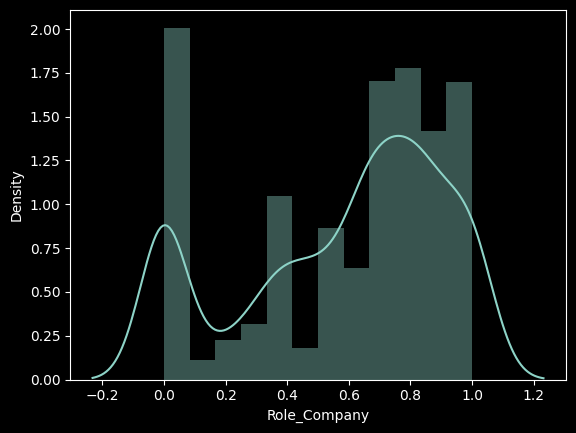

In [33]:
# Role Company 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['Role_Company'])

In [35]:
# 구간화
import numpy as np
df['Role_Company_gp'] =np.where(df['Role_Company'] <=0.4, '0.4 이하',
         np.where(df['Role_Company'] <=0.8,'0.4-0.8', '0.8 초과'))
df[['Role_Company', 'Role_Company_gp']]

,Role_Company,Role_Company_gp
0,0.666667,0.4-0.8
1,0.700000,0.4-0.8
2,0.000000,0.4 이하
3,0.875000,0.8 초과
4,1.000000,0.8 초과
...,...,...
1465,0.400000,0.4 이하
1466,1.000000,0.8 초과
1467,0.333333,0.4 이하
1468,0.666667,0.4-0.8


In [38]:
# 근속년수 대비 같은 일을 오래한 경우 이직률이 낮음.
df_gp = df.groupby('Role_Company_gp')['Attrition'].agg(['count','sum'])
df_gp['ratio'] =round((df_gp['sum']/df_gp['count'])*100,1)
df_gp

,count,sum,ratio
Role_Company_gp,,,
0.4 이하,454,103,22.7
0.4-0.8,621,81,13.0
0.8 초과,395,53,13.4


### Hypothesis(3)
---
* 야근을 많이해도 급여인상률이 높다면 이직률이 낮을 것이다.

In [39]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_gp,Role_Company,Role_Company_gp
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,40대 이상,0.666667,0.4-0.8
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,40대 이상,0.700000,0.4-0.8
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,30-40대,0.000000,0.4 이하
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,30-40대,0.875000,0.8 초과
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,30 이하,1.000000,0.8 초과


In [42]:
# 야근 여부에 따른 이직률 현황
df_gp = df.groupby('OverTime')['Attrition'].agg(['count','sum'])
df_gp['ratio'] =round((df_gp['sum']/df_gp['count'])*100,1)
df_gp

,count,sum,ratio
OverTime,,,
No,1054,110,10.4
Yes,416,127,30.5


In [44]:
# 야근 No 직원은 연봉상승률이 높으면 이직을 대체로 안함.
# 야근 Yes 직원은 연봉상승률이 높더라도 이직을 대체로 함.
df_gp = df.groupby(['OverTime','PercentSalaryHike'])['Attrition'].agg(['count','sum'])
df_gp['ratio'] =round((df_gp['sum']/df_gp['count'])*100,1)
df_gp

count  sum  ratio
OverTime PercentSalaryHike                   
No       11                   149   19   12.8
         12                   139   18   12.9
         13                   144   14    9.7
         14                   145    8    5.5
         15                    80   12   15.0
         16                    55    8   14.5
         17                    66    9   13.6
         18                    60    5    8.3
         19                    55    3    5.5
         20                    40    4   10.0
         21                    36    2    5.6
         22                    41    6   14.6
         23                    19    1    5.3
         24                    12    1    8.3
         25                    13    0    0.0
Yes      11                    61   22   36.1
         12                    59   15   25.4
         13                    65   20   30.8
         14                    56   16   28.6
         15                    21    6   28.6
         16                    23    6   26.1
         17                    16    5   31.2
         18                    29    8   27.6
         19                    21    6   28.6
         20                    15    3   20.0
         21                    12    3   25.0
         22                    15    6   40.0
         23                     9    5   55.6
         24                     9    5   55.6
         25                     5    1   20.0

In [47]:
# 야근 Yes 직원 Data 분석
df_gp_plot = df_gp.reset_index()
df_gp_plot = df_gp_plot[df_gp_plot['OverTime']=='Yes']
df_gp_plot

,OverTime,PercentSalaryHike,count,sum,ratio
15,Yes,11,61,22,36.1
16,Yes,12,59,15,25.4
17,Yes,13,65,20,30.8
18,Yes,14,56,16,28.6
19,Yes,15,21,6,28.6
20,Yes,16,23,6,26.1
21,Yes,17,16,5,31.2
22,Yes,18,29,8,27.6
23,Yes,19,21,6,28.6
24,Yes,20,15,3,20.0


<BarContainer object of 15 artists>

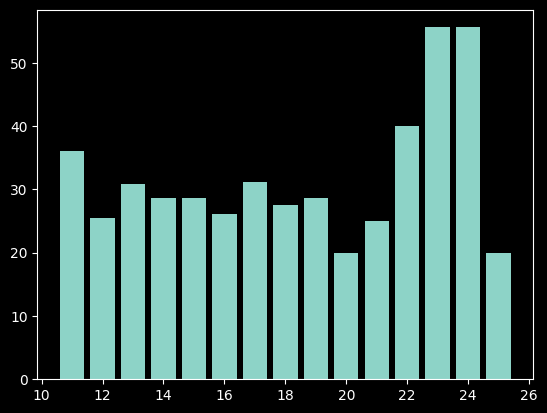

In [48]:
# 야근 Yes 직원 Data 분석, 20% 상승률까지는 감소하는 듯 보였으나 22%이상 상승하는 핵심인재의 경우 바로 이직함.
plt.bar(df_gp_plot['PercentSalaryHike'], df_gp_plot['ratio'])

## Session 3
## ML 활용 이직 직원 예측

### 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y데이터로 나눔.  
* 학습과 예측을 위한 Train / Test set 분할

In [49]:
# numeric, categorical value 나누기
numeric_list = []
categorical_list = []
for col in df.columns:
  if df[col].dtype != 'object':
    numeric_list.append(col)
  else:
    categorical_list.append(col)

print('categorical_list :', categorical_list)
print('numeric_list :', numeric_list)

categorical_list : ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Age_gp', 'Role_Company_gp']
numeric_list : ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Role_Company']


In [50]:
# ▶ 모델링을 학습하기 위한 Fearue(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['Attrition', 'Age_gp', 'Role_Company_gp', 'Role_Company'], axis=1)
Y=df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1029, 34)
(1029,)
(441, 34)
(441,)


In [51]:
# EDA 과정에서 생성한 변수 제거
categorical_list.remove('Age_gp')
categorical_list.remove('Role_Company_gp')

In [53]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list :
  print(col)
  le = LabelEncoder()
  le.fit(list(x_train[col].values) + list(x_test[col].values))
  x_train[col] = le.transform(x_train[col])
  x_test[col] = le.transform(x_test[col])

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [54]:
x_test[categorical_list].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
1024,2,1,3,0,5,1,0,0
678,2,1,3,1,6,1,0,0
432,2,1,1,1,6,0,0,0
1154,2,0,1,0,3,1,0,0
143,2,1,1,0,6,2,0,0


### 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [56]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=123456, max_depth = 3, n_estimators=125)
rfc.fit(x_train, y_train)

# 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       863
           1       1.00      0.09      0.17       166

    accuracy                           0.85      1029
   macro avg       0.93      0.55      0.54      1029
weighted avg       0.88      0.85      0.80      1029

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.01      0.03        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [57]:
pd.Series(y_pred_test).value_counts()

0    440
1      1
Name: count, dtype: int64

In [61]:
from sklearn.metrics import classification_report

y_pred_train = rfc.predict_proba(x_train)[:,1]
for i in range(0, len(y_pred_train)):
  if y_pred_train[i]>=.3:
    y_pred_train[i]=1
  else:
    y_pred_train[i]=0

y_pred_test = rfc.predict_proba(x_test)[:, 1]
for i in range(0, len(y_pred_test)):
  if y_pred_test[i]>=.3:
    y_pred_test[i]=1
  else:
    y_pred_test[i]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       863
           1       0.65      0.28      0.39       166

    accuracy                           0.86      1029
   macro avg       0.76      0.62      0.65      1029
weighted avg       0.84      0.86      0.83      1029

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       370
           1       0.49      0.24      0.32        71

    accuracy                           0.84       441
   macro avg       0.68      0.60      0.61       441
weighted avg       0.81      0.84      0.81       441



In [62]:
pd.Series(y_pred_test).value_counts()

0.0    406
1.0     35
Name: count, dtype: int64

In [63]:
35/441

0.07936507936507936

In [64]:
# 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8604755057309189
roc_score_test : 0.7793681004948612


In [65]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

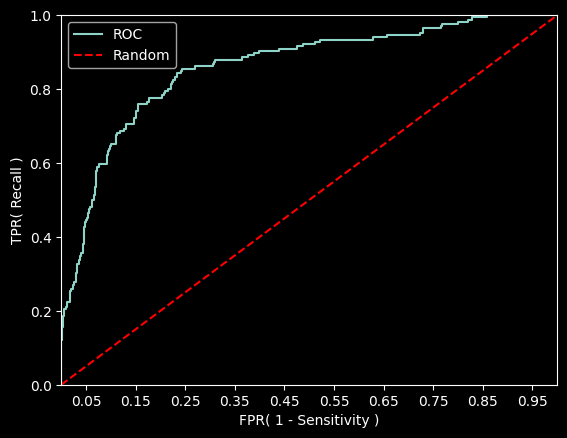

In [66]:
roc_curve_plot(y_train, y_pred_train_proba)

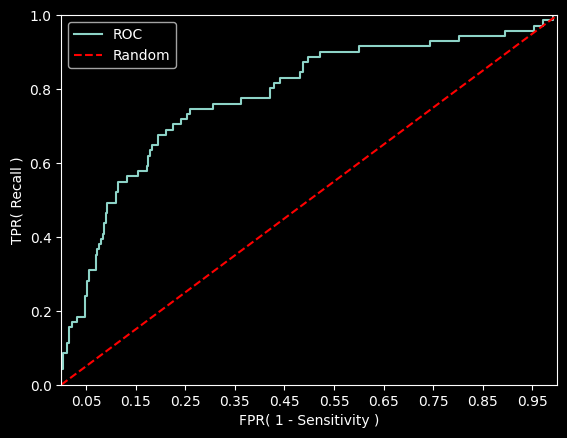

In [67]:
roc_curve_plot(y_test, y_pred_test_proba)

### 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

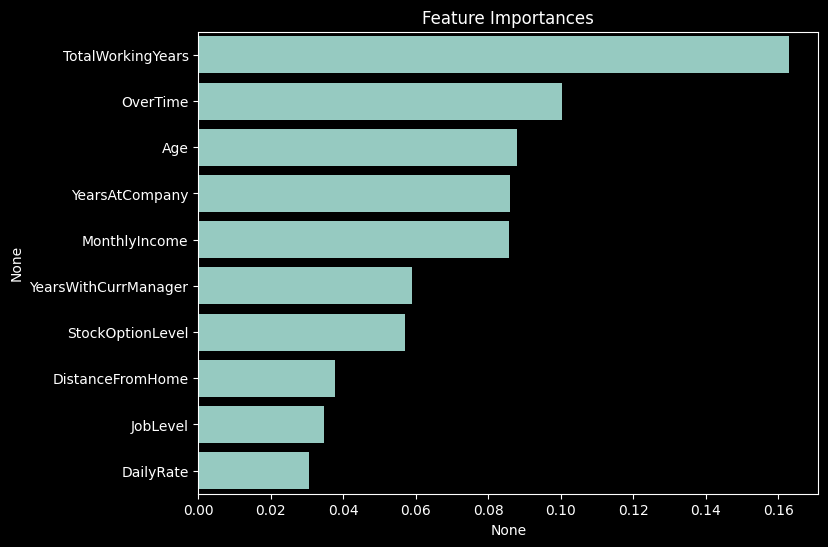

In [68]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

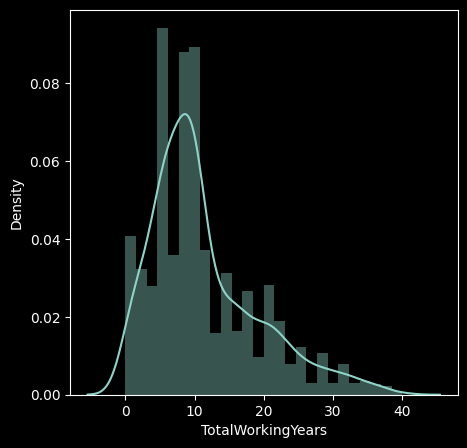

In [70]:
# 1위 변수 탐색
sns.distplot(df['TotalWorkingYears'])
plt.gcf().set_size_inches(5, 5)

In [71]:
# 구간화
df['TotalWorkingYears_gp'] = np.where(df['TotalWorkingYears'] <=10, '10 이하',
                                      np.where(df['TotalWorkingYears']<=20, '10-20', '20 초과'))

df[['TotalWorkingYears', 'TotalWorkingYears_gp']]

,TotalWorkingYears,TotalWorkingYears_gp
0,8,10 이하
1,10,10 이하
2,7,10 이하
3,8,10 이하
4,6,10 이하
...,...,...
1465,17,10-20
1466,9,10 이하
1467,6,10 이하
1468,17,10-20


In [73]:
# 총 경이 낮을수록 이직률이 높다.
df_gp = df.groupby('TotalWorkingYears_gp')['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count'])*100, 1)
df_gp

,count,sum,ratio
TotalWorkingYears_gp,,,
10 이하,923,182,19.7
10-20,340,39,11.5
20 초과,207,16,7.7



### 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [74]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfc)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)